In [ ]:
import pandas as pd

# Load the data files
df = pd.read_excel('New_Employ.xlsx')

# setting time frame
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df.head()


,Timestamp,Monthly Unemployment Rate,S&P500,Global Price of Energy Index,Federal Funds Effective Rate,Labor Paricipance Rate,10-Year Expected Inflation,Average Egg Price,Global Price of Aluminium,Global Price of Olive Oil
0,2001-01-01,4.2,735.09,82.367105,5.98,67.2,2.533293,1.011,1619.877273,2624.08
1,2001-02-01,4.2,797.87,76.511028,5.49,67.1,2.641816,0.943,1607.030000,2552.27
2,2001-03-01,4.3,815.28,72.127031,5.31,67.2,2.498687,0.886,1512.172727,2565.32
3,2001-04-01,4.4,825.88,73.105310,4.80,66.9,2.586794,1.028,1499.483333,2597.95
4,2001-05-01,4.3,841.15,73.018054,4.21,66.7,2.761929,0.881,1542.390476,2581.68


## Discovering null values

In [ ]:
df.isnull().sum()

Timestamp                       0
Monthly Unemployment Rate       0
S&P500                          0
Global Price of Energy Index    0
Federal Funds Effective Rate    0
Labor Paricipance Rate          0
10-Year Expected Inflation      0
Average Egg Price               0
Global Price of Aluminium       0
Global Price of Olive Oil       0
dtype: int64

## Discovering duplicates

In [ ]:
df[df.duplicated(keep=False)]

,Timestamp,Monthly Unemployment Rate,S&P500,Global Price of Energy Index,Federal Funds Effective Rate,Labor Paricipance Rate,10-Year Expected Inflation,Average Egg Price,Global Price of Aluminium,Global Price of Olive Oil


In [ ]:
df = df.drop_duplicates()

### Import libraries


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm

# 1. Preview dataset



##1.1   dimension of data & types of data


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Timestamp                     240 non-null    datetime64[ns]
 1   Monthly Unemployment Rate     240 non-null    float64       
 2   S&P500                        240 non-null    float64       
 3   Global Price of Energy Index  240 non-null    float64       
 4   Federal Funds Effective Rate  240 non-null    float64       
 5   Labor Paricipance Rate        240 non-null    float64       
 6   10-Year Expected Inflation    240 non-null    float64       
 7   Average Egg Price             240 non-null    float64       
 8   Global Price of Aluminium     240 non-null    float64       
 9   Global Price of Olive Oil     240 non-null    float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 18.9 KB


##1.2 Statistics of data

In [ ]:
df.describe()

,Timestamp,Monthly Unemployment Rate,S&P500,Global Price of Energy Index,Federal Funds Effective Rate,Labor Paricipance Rate,10-Year Expected Inflation,Average Egg Price,Global Price of Aluminium,Global Price of Olive Oil
count,240,240.00000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,2010-12-16 05:00:00,6.08750,1667.765750,146.634898,1.491167,64.500000,2.019065,1.592758,1923.152927,3833.776749
min,2001-01-01 00:00:00,3.50000,735.090000,49.446172,0.050000,60.100000,1.158350,0.862000,1283.530435,1313.413878
25%,2005-12-24 06:00:00,4.70000,1146.777500,102.975397,0.140000,62.900000,1.713965,1.283750,1623.906818,3086.149315
50%,2010-12-16 12:00:00,5.60000,1378.935000,138.979060,1.005000,64.250000,1.972073,1.567500,1849.167262,3815.934608
75%,2015-12-08 18:00:00,7.35000,2081.685000,188.464880,2.167500,66.100000,2.351328,1.858250,2136.449811,4524.067899
max,2020-12-01 00:00:00,14.80000,3756.070000,308.945845,5.980000,67.200000,2.952036,2.966000,3067.456522,5853.978643
std,NaN,1.97423,692.484209,58.287710,1.643967,1.632464,0.393538,0.394140,414.529386,874.733919


# 2. EDA

##2.1 Distribution of data


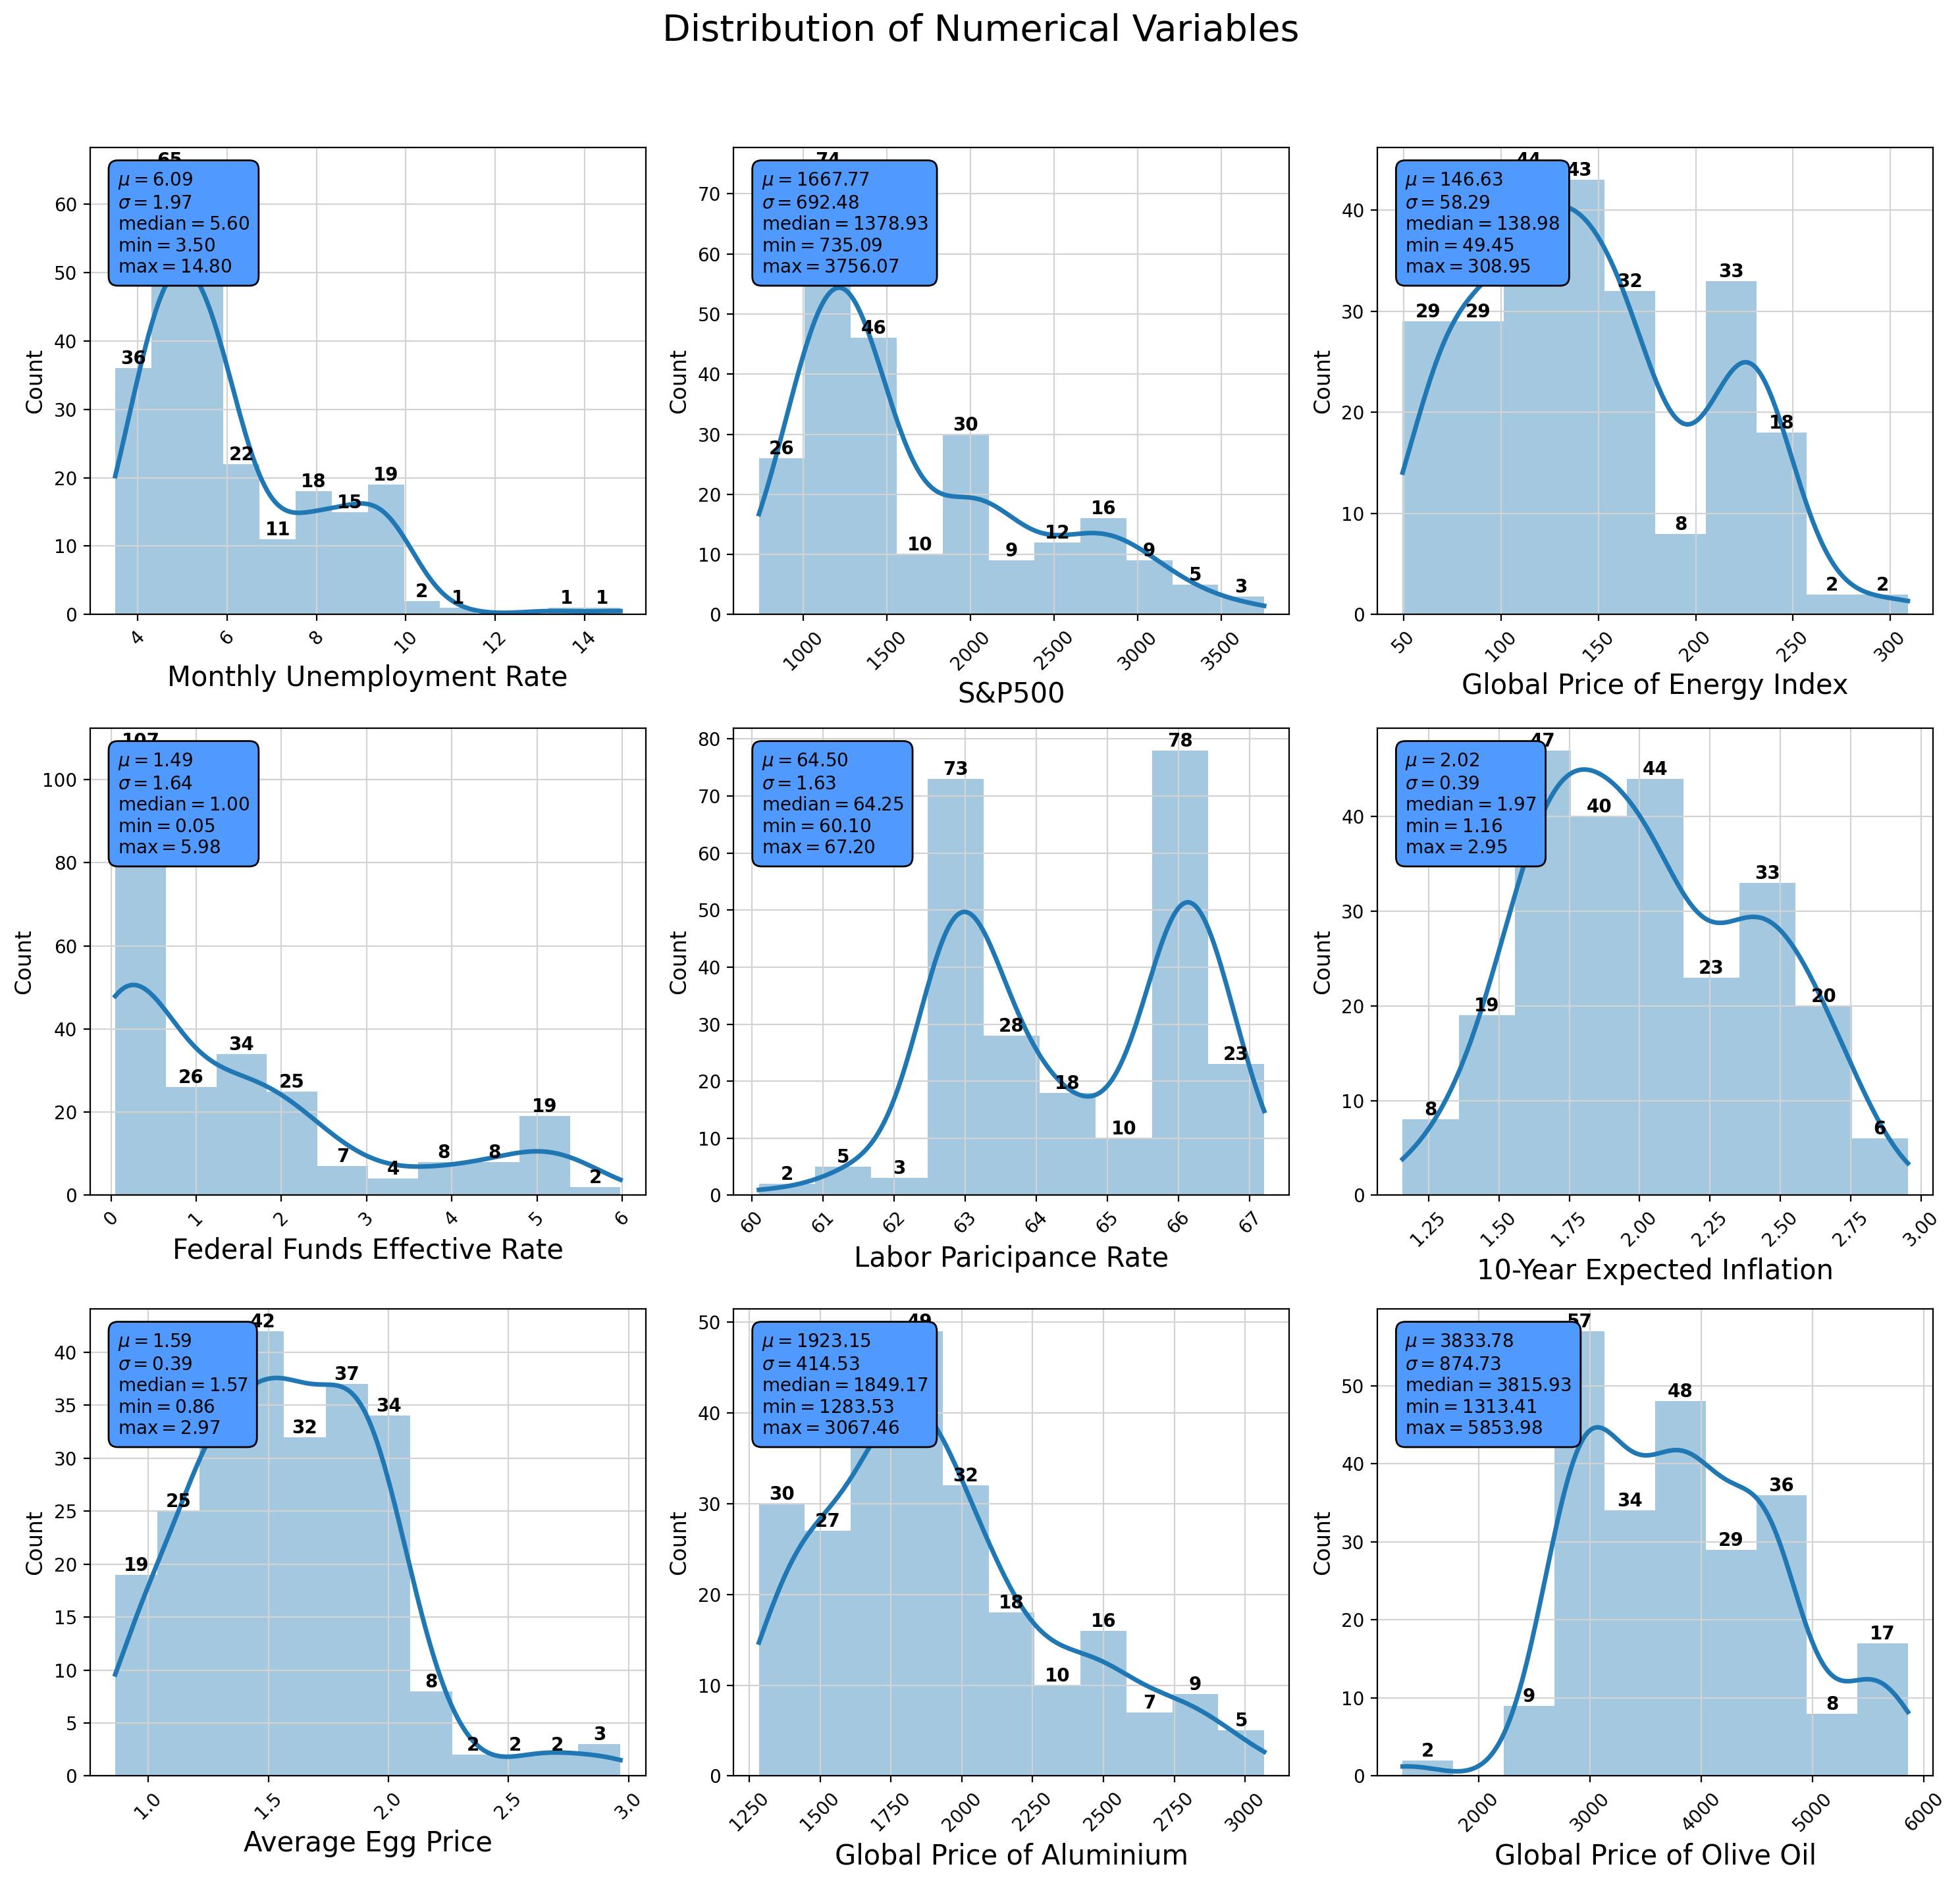

In [ ]:

NumCols_clean = df.select_dtypes(include=np.number).columns
# Calculate the required number of rows and columns for the subplot grid
num_columns_clean = len(NumCols_clean)
num_rows_clean = num_columns_clean // 3 + (num_columns_clean % 3 > 0)  # Ensure we have enough rows

fig, ax = plt.subplots(nrows=num_rows_clean, ncols=3, figsize=(15, num_rows_clean * 5), dpi=200)  # Adjust figure size based on rows

for i in range(len(NumCols_clean)):
    row = i // 3
    col = i % 3
    graph = sns.histplot(data=df, x=NumCols_clean[i], kde=True, ax=ax[row, col] if num_rows_clean > 1 else ax[col],
                         edgecolor='none',  alpha=0.4, line_kws={'lw': 2.5})
    ax[row, col if num_rows_clean > 1 else col].set_xlabel(NumCols_clean[i], fontsize=15)
    ax[row, col if num_rows_clean > 1 else col].set_ylabel('Count', fontsize=12)
    ax[row, col if num_rows_clean > 1 else col].tick_params(axis='x', rotation=45)
    ax[row, col if num_rows_clean > 1 else col].grid(color='lightgrey')

    # Adjusting annotation to avoid overlap and ensure visibility
    for j, p in enumerate(graph.patches):
        height = p.get_height()
        if height > 0:  # Annotating non-zero bars
            ax[row, col if num_rows_clean > 1 else col].annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                                  ha='center', fontsize=10, fontweight="bold", verticalalignment='bottom')

    # Adding summary statistics text box
    textstr = '\n'.join((
        r'$\mu=%.2f$' % df[NumCols_clean[i]].mean(),
        r'$\sigma=%.2f$' % df[NumCols_clean[i]].std(),
        r'$\mathrm{median}=%.2f$' % np.median(df[NumCols_clean[i]]),
        r'$\mathrm{min}=%.2f$' % df[NumCols_clean[i]].min(),
        r'$\mathrm{max}=%.2f$' % df[NumCols_clean[i]].max()
    ))
    ax[row, col if num_rows_clean > 1 else col].text(0.05, 0.95, textstr, transform=ax[row, col if num_rows_clean > 1 else col].transAxes, fontsize=10,
                      verticalalignment='top', bbox=dict(boxstyle='round', facecolor='#509aff',
                                                         edgecolor='black', pad=0.5))

# Adjust for an uneven number of plots
if len(NumCols_clean) % 3:
    for i in range(3 - len(NumCols_clean) % 3):  # Turn off remaining axes in the last row
        ax[num_rows_clean-1, 2 - i if num_rows_clean > 1 else 2 - i].axis('off')

plt.suptitle('Distribution of Numerical Variables', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the suptitle
plt.savefig('Distribution of Numerical Variables.png', dpi=300)
plt.show()


##Time Series plot

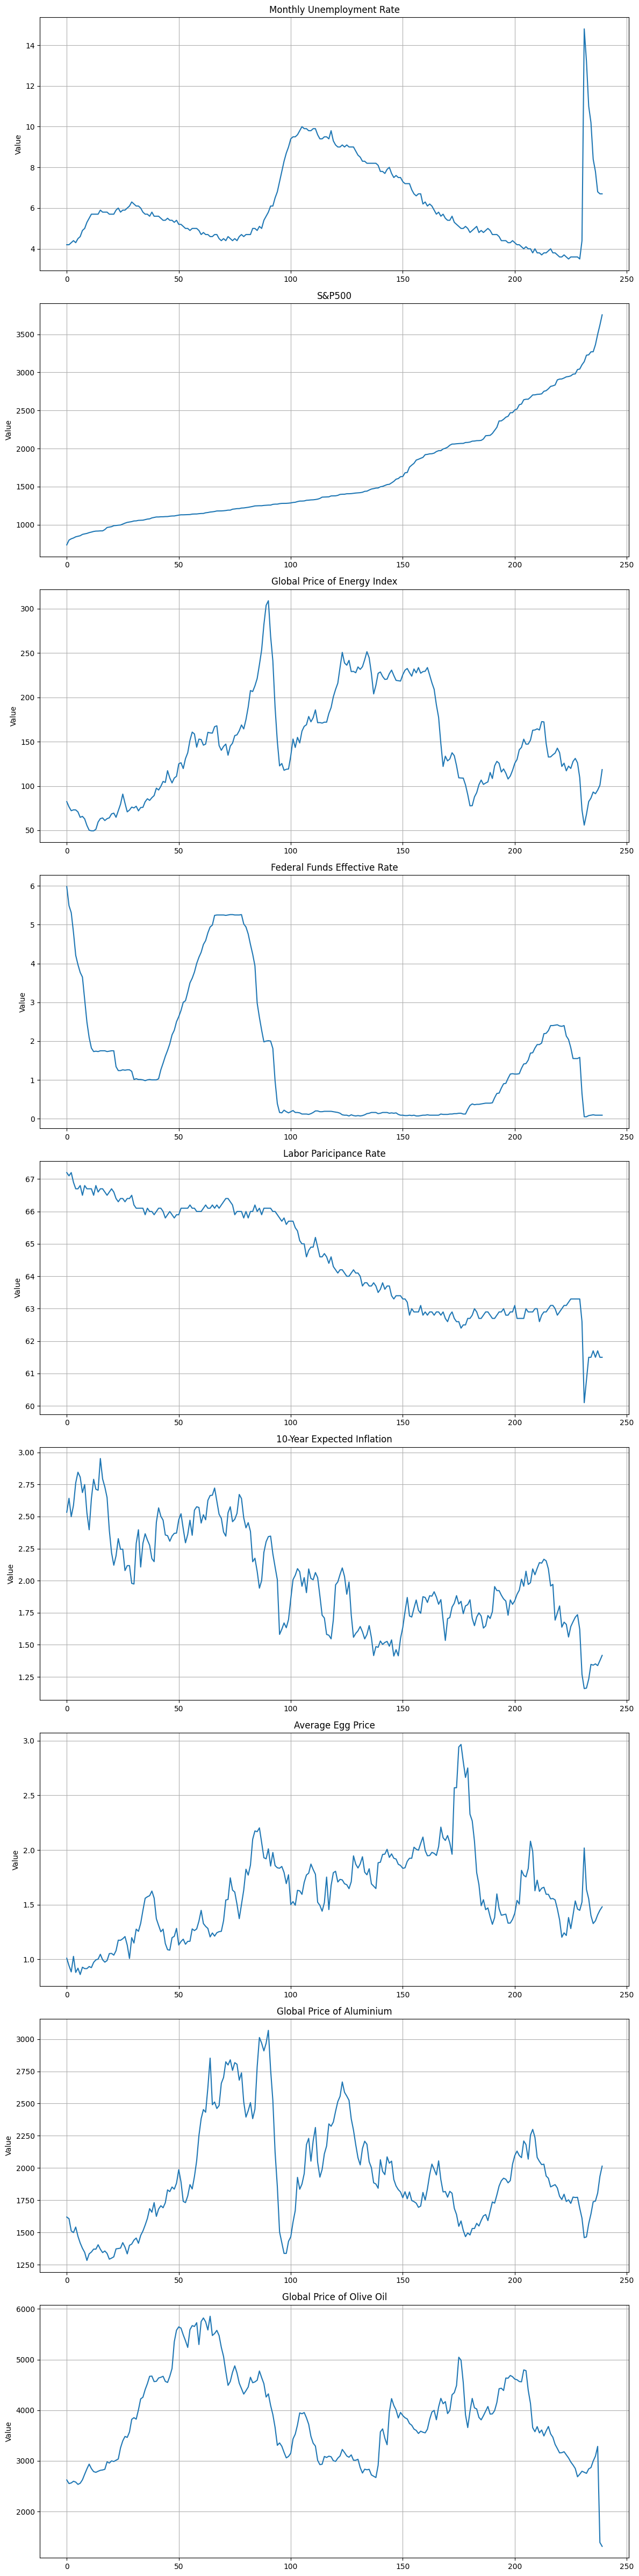

In [ ]:
num_plots = len(df.columns[1:10])  # Adjust this if there are more or fewer columns to plot

plt.figure(figsize=(12, 48))  # Set the overall figure size

# Create a subplot for each column
for i, column in enumerate(df.columns[1:10], start=1):  # Adjust the range for different columns
    ax = plt.subplot(num_plots, 1, i)
    df[column].plot(ax=ax)
    ax.set_title(column)
    ax.set_ylabel('Value')
    ax.grid(True)

plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()  # Display all plots


## 2.2 Outlier detection

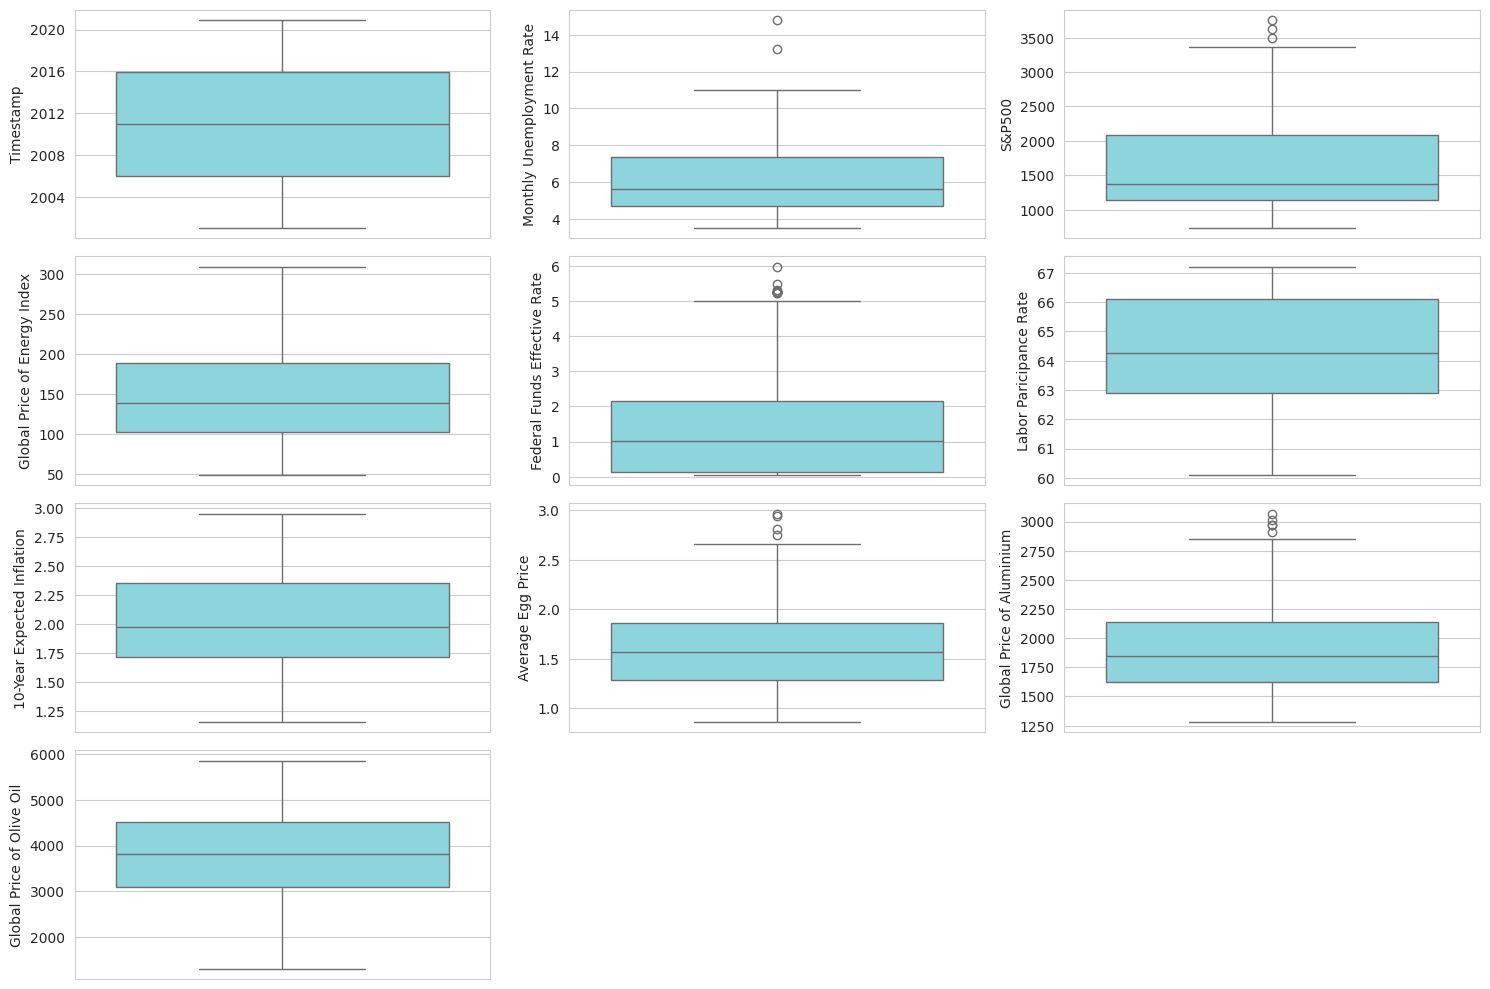

In [ ]:
sns.set_style('whitegrid')
colors = ['#80deea', '#0277bd', '#ff8a65']
sns.set_palette(sns.color_palette(colors))

OrderedCols = np.concatenate([df.select_dtypes(exclude='object').columns.values,
                              df.select_dtypes(include='object').columns.values])

# Calculate the number of rows and columns needed for the subplots
n_cols = 3
n_rows = (len(OrderedCols) + n_cols - 1) // n_cols  # Round up to ensure enough rows

fig, ax = plt.subplots(n_rows, n_cols, figsize=(15, 10), dpi=100)

for i, col in enumerate(OrderedCols):
    x = i // n_cols
    y = i % n_cols

    sns.boxplot(data=df, y=col, ax=ax[x, y])
    ax[x, y].yaxis.label.set_size(10)

# Hide any unused subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(ax.flatten()[j])

plt.tight_layout()
plt.savefig('boxplot.png')
plt.show()

## 2.3 Linearity Check

### 2.3.1 Scatter plot between numerical features and target variable

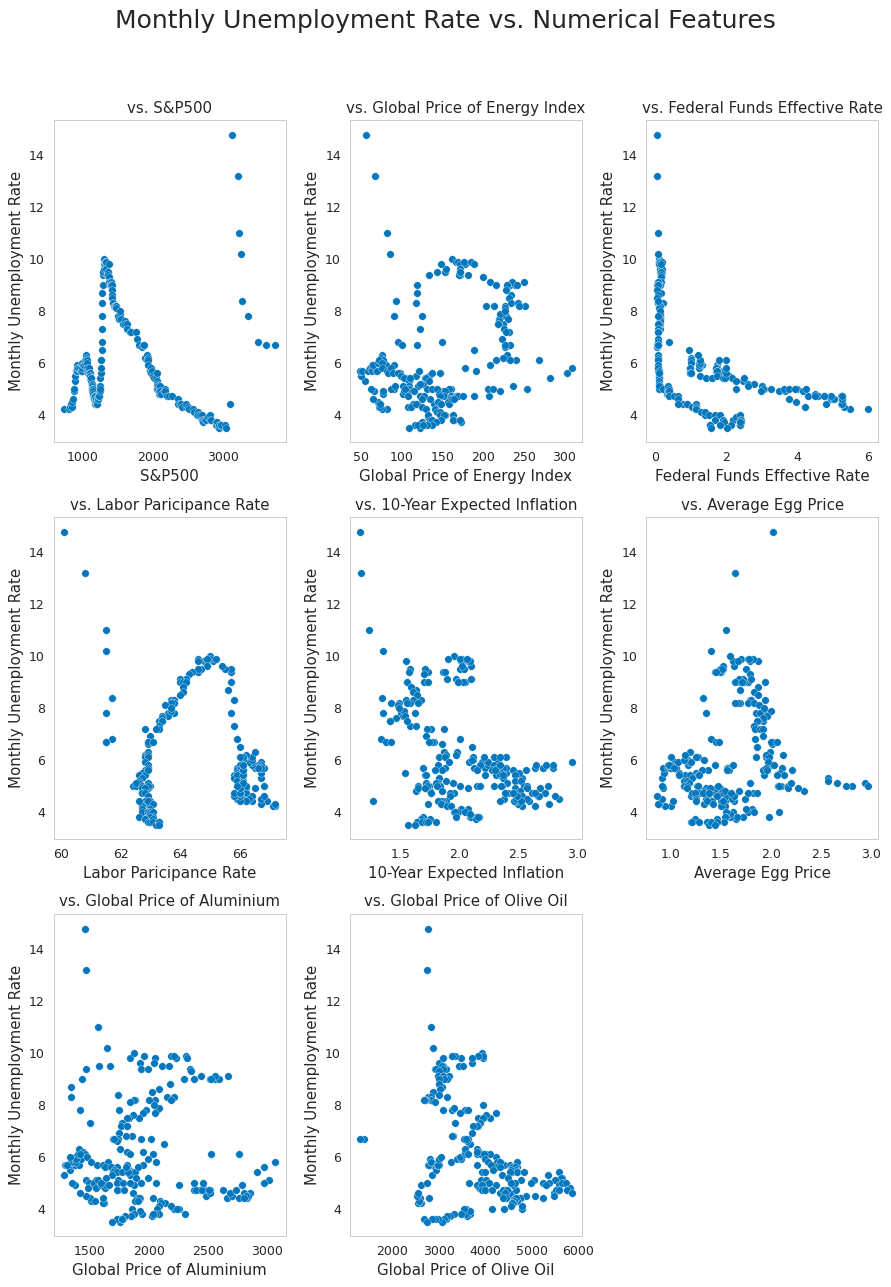

In [ ]:
num_features = df.columns[2:]
target = 'Monthly Unemployment Rate'
c = '#0277bd'

# Set up for a 3x3 grid
num_rows, num_cols = 3, 3

fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 5*num_rows), dpi=90)

# Flatten the ax array for easier indexing
ax_flat = ax.flatten()

for i, feature in enumerate(num_features):
    ax_flat[i].scatter(df[feature], df[target], color=c, edgecolors='w', linewidths=0.25)
    ax_flat[i].set_title(f'vs. {feature}', size=12)
    ax_flat[i].set_xlabel(feature, size=12)
    ax_flat[i].set_ylabel(target, size=12)
    ax_flat[i].grid()

# Remove the unused subplot(s)
for j in range(i + 1, num_rows*num_cols):
    fig.delaxes(ax_flat[j])

plt.suptitle('Monthly Unemployment Rate vs. Numerical Features', size=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('Monthly Unemployment Rate vs. Numerical Features_3x3.png')
plt.show()



# Diagonstic Test

## 3.1 Multicollinearity issue

### 3.1.1 Correlation matrix (before)


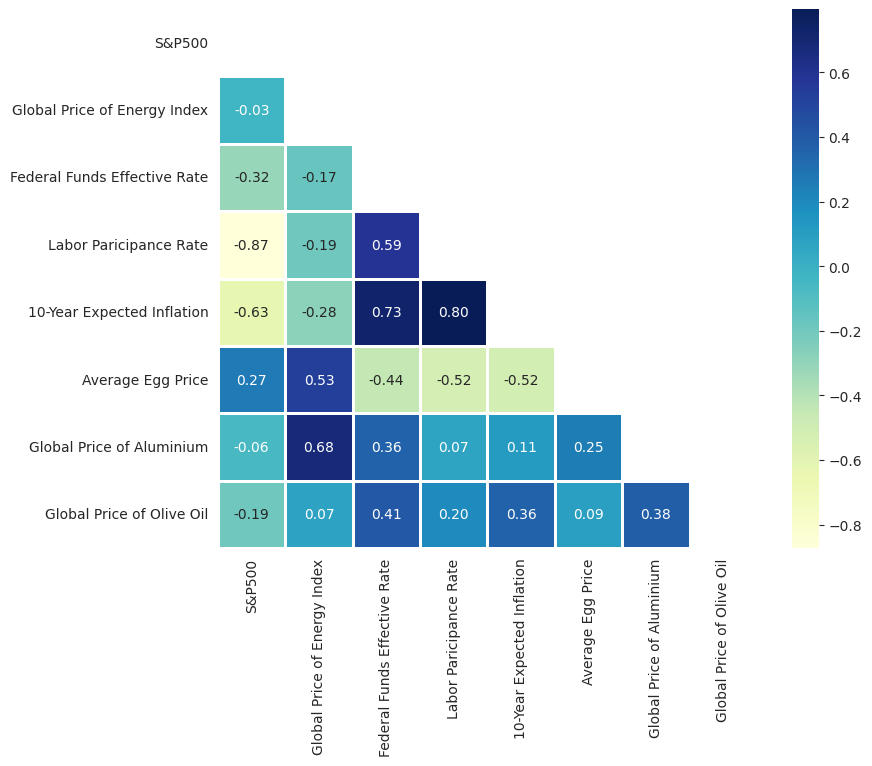

In [ ]:
# Calculate the correlation matrix
# drop dependent variable to only consider correlation within independent variable

df_drop = df.drop(columns = ['Monthly Unemployment Rate','Timestamp'])
corr = df_drop.corr()

# Create a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure with white background style
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    # Draw the heatmap with the mask and correct aspect ratio, using "YlGnBu" colormap
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True, fmt='0.2f', linewidths=.8, cmap="YlGnBu")

# Save the figure to a file
plt.savefig('correlation_matrix.png')

### Correlation matrix (after removing highly correlated variables)

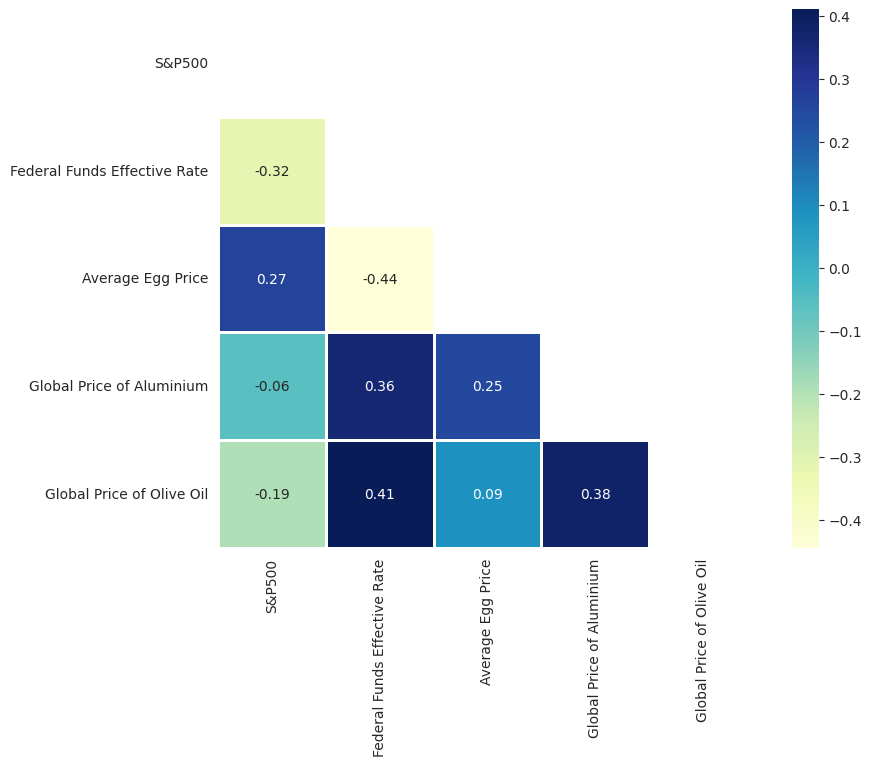

In [ ]:
# Calculate the correlation matrix
# drop dependent variable to only consider correlation within independent variable
df_drop = df.drop(columns = ['Monthly Unemployment Rate', 'Global Price of Energy Index', 'Labor Paricipance Rate', '10-Year Expected Inflation','Timestamp'])
corr = df_drop.corr()

# Create a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure with white background style
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    # Draw the heatmap with the mask and correct aspect ratio, using "YlGnBu" colormap
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True, fmt='0.2f', linewidths=.8, cmap="YlGnBu")

# Save the figure to a file
plt.savefig('correlation_matrix.png')

### 3.1.2 VIF

In [ ]:
#df = df.drop(columns=['Global Price of Energy Index','Labor Paricipance Rate','10-Year Expected Inflation'])
X = add_constant(df.drop(columns=['Monthly Unemployment Rate','Timestamp']))

# Create a DataFrame for VIFs
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                        feature           VIF
0                         const  20693.531843
1                        S&P500      8.367506
2  Global Price of Energy Index      3.940510
3  Federal Funds Effective Rate      3.725557
4        Labor Paricipance Rate     11.979279
5    10-Year Expected Inflation      4.354456
6             Average Egg Price      2.282088
7     Global Price of Aluminium      3.845616
8     Global Price of Olive Oil      1.569767


### VIF after dropping highly correlated variables (df is modified)


In [ ]:
df = df.drop(columns=['Global Price of Energy Index','Labor Paricipance Rate','10-Year Expected Inflation'])
X = add_constant(df.drop(columns=['Monthly Unemployment Rate','Timestamp']))

# Create a DataFrame for VIFs
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                        feature        VIF
0                         const  46.083749
1                        S&P500   1.155957
2  Federal Funds Effective Rate   2.125130
3             Average Egg Price   1.796366
4     Global Price of Aluminium   1.546905
5     Global Price of Olive Oil   1.399345


## 3.2 Outlier Handling


### 3.2.1 Cook's distance

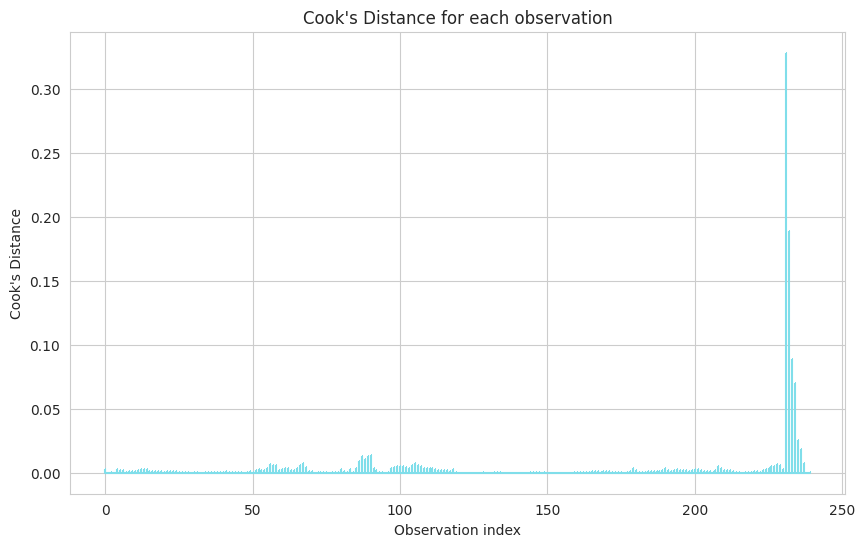

Potential outliers based on Cook's distance: [231 232 233 234 235 236] number of potential outliers 6


In [ ]:
y = df['Monthly Unemployment Rate']
# Fit the ordinary least squares (OLS) model
X = df[['S&P500', 'Federal Funds Effective Rate', 'Average Egg Price', 'Global Price of Aluminium', 'Global Price of Olive Oil']]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Calculate Cook's distance
influence = model.get_influence()
(c, p) = influence.cooks_distance

# Plot Cook's distance
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.title("Cook's Distance for each observation")
plt.xlabel('Observation index')
plt.ylabel("Cook's Distance")
plt.show()

# Identify outliers
# A common rule of thumb is that observations with a Cook's distance larger than 4/n, where n is the number of observations, might be influential
n = len(X)
influential_points= np.where(c > 4/n)[0]

print('Potential outliers based on Cook\'s distance:', influential_points, 'number of potential outliers',len(influential_points))

### 3.2.2 Removing Outliers

In [ ]:
# Drop the outliers
df = df.drop(influential_points)

# Show the shape of the original and cleaned dataframes to confirm rows are dropped
print("Cleaned DataFrame shape:", df.shape)
df.head()

df.to_csv('stand.csv')

Cleaned DataFrame shape: (234, 7)


## Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd


def standardize_select_columns(df, exclude_columns):
    # Separate the columns to exclude from the columns to standardize
    columns_to_standardize = df.columns.difference(exclude_columns)
    columns_to_exclude = exclude_columns

    # Standardize the selected columns
    scaler = StandardScaler()
    standardized_data = scaler.fit_transform(df[columns_to_standardize])

    # Convert the scaled data back to a DataFrame
    standardized_df = pd.DataFrame(standardized_data, index=df.index, columns=columns_to_standardize)

    # Combine the standardized columns with the untouched columns
    final_df = pd.concat([standardized_df, df[columns_to_exclude]], axis=1)

    return final_df

columns_to_exclude = ['Timestamp']

# Standardize the DataFrame
df_standardized = standardize_select_columns(df, columns_to_exclude)

df = df_standardized
df

,Average Egg Price,Federal Funds Effective Rate,Global Price of Aluminium,Global Price of Olive Oil,Monthly Unemployment Rate,S&P500,Timestamp
0,-1.470251,2.705865,-0.749987,-1.417643,-0.983972,-1.370336,2001-01-01
1,-1.641774,2.408088,-0.780922,-1.500144,-0.983972,-1.273901,2001-02-01
2,-1.785552,2.298700,-1.009327,-1.485151,-0.928195,-1.247158,2001-03-01
3,-1.427370,1.988768,-1.039881,-1.447663,-0.872417,-1.230875,2001-04-01
4,-1.798164,1.630220,-0.936566,-1.466356,-0.928195,-1.207419,2001-05-01
...,...,...,...,...,...,...,...
229,-0.365436,0.031944,-0.585727,-1.286835,-1.374415,2.176809,2020-02-01
230,-0.173733,-0.533226,-0.771625,-1.219836,-0.872417,2.262799,2020-03-01
237,-0.468855,-0.873543,-0.301580,-0.657591,0.466243,2.877261,2020-10-01
238,-0.362914,-0.873543,0.009473,-2.835486,0.410465,3.063618,2020-11-01


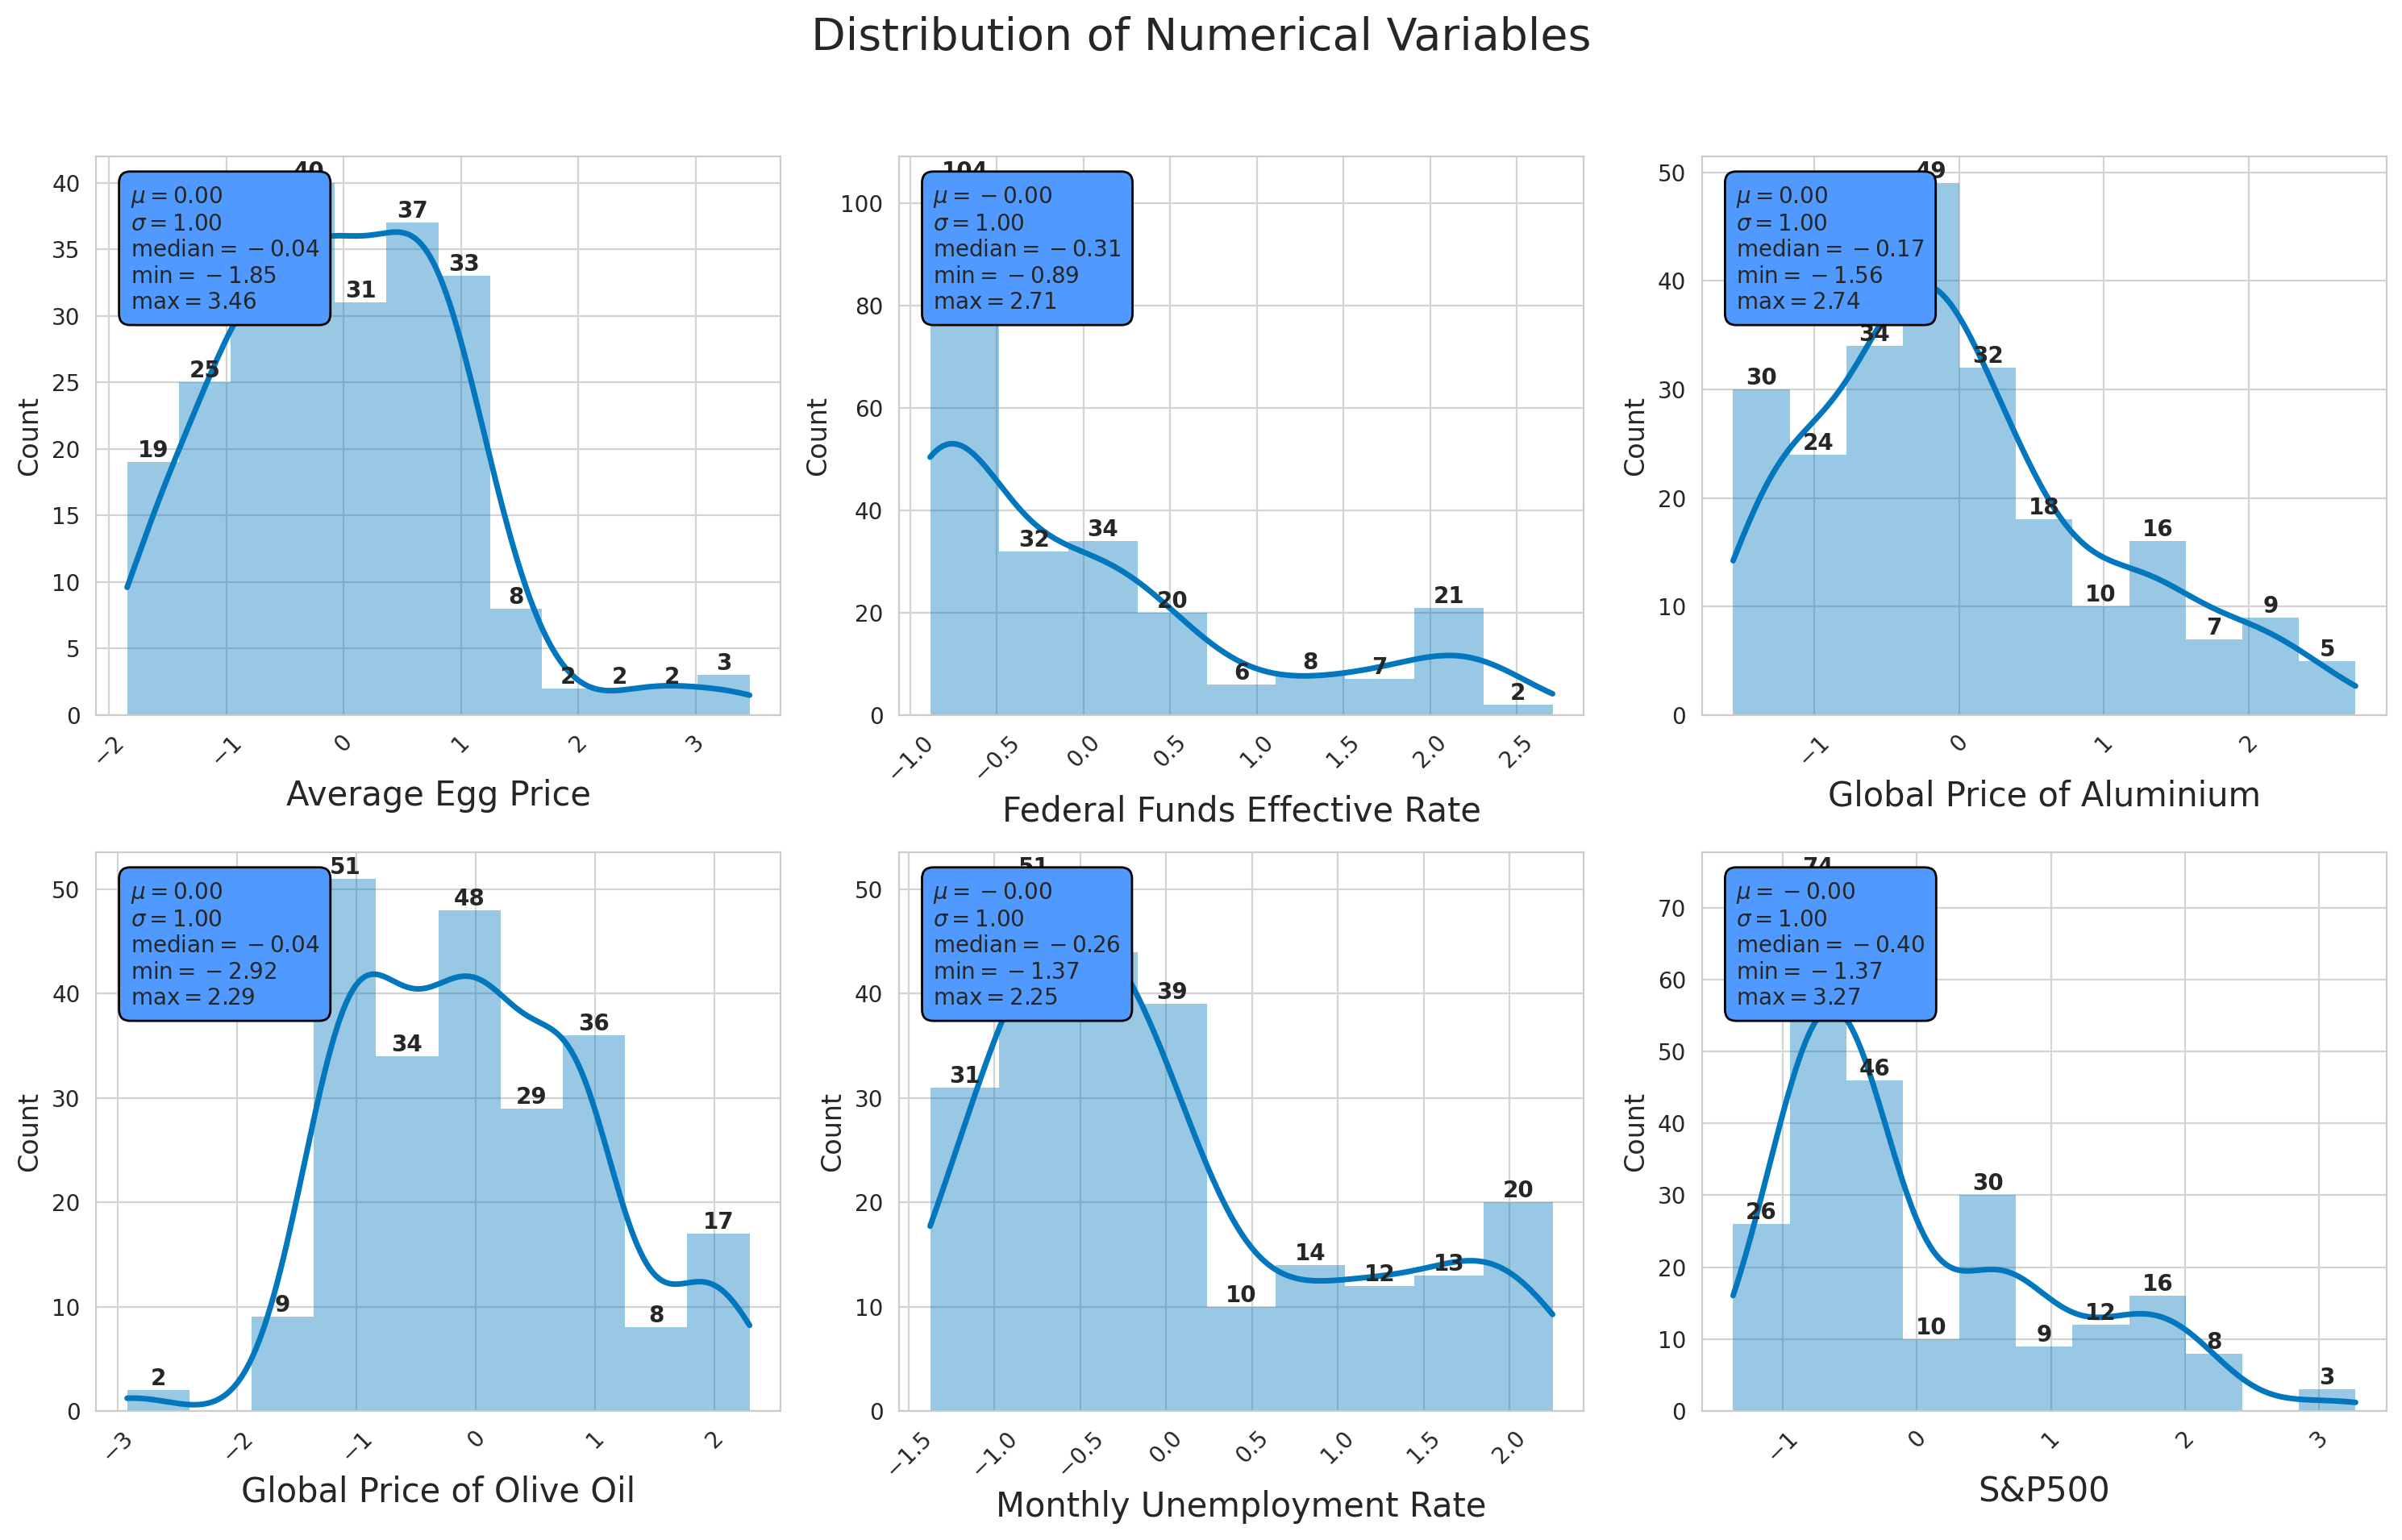

In [ ]:

NumCols_clean = df.select_dtypes(include=np.number).columns
# Calculate the required number of rows and columns for the subplot grid
num_columns_clean = len(NumCols_clean)
num_rows_clean = num_columns_clean // 3 + (num_columns_clean % 3 > 0)  # Ensure we have enough rows

fig, ax = plt.subplots(nrows=num_rows_clean, ncols=3, figsize=(15, num_rows_clean * 5), dpi=200)  # Adjust figure size based on rows

for i in range(len(NumCols_clean)):
    row = i // 3
    col = i % 3
    graph = sns.histplot(data=df, x=NumCols_clean[i], kde=True, ax=ax[row, col] if num_rows_clean > 1 else ax[col],
                         edgecolor='none',  alpha=0.4, line_kws={'lw': 2.5},color = '#0277bd')
    ax[row, col if num_rows_clean > 1 else col].set_xlabel(NumCols_clean[i], fontsize=15)
    ax[row, col if num_rows_clean > 1 else col].set_ylabel('Count', fontsize=12)
    ax[row, col if num_rows_clean > 1 else col].tick_params(axis='x', rotation=45)
    ax[row, col if num_rows_clean > 1 else col].grid(color='lightgrey')

    # Adjusting annotation to avoid overlap and ensure visibility
    for j, p in enumerate(graph.patches):
        height = p.get_height()
        if height > 0:  # Annotating non-zero bars
            ax[row, col if num_rows_clean > 1 else col].annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                                  ha='center', fontsize=10, fontweight="bold", verticalalignment='bottom')

    # Adding summary statistics text box
    textstr = '\n'.join((
        r'$\mu=%.2f$' % df[NumCols_clean[i]].mean(),
        r'$\sigma=%.2f$' % df[NumCols_clean[i]].std(),
        r'$\mathrm{median}=%.2f$' % np.median(df[NumCols_clean[i]]),
        r'$\mathrm{min}=%.2f$' % df[NumCols_clean[i]].min(),
        r'$\mathrm{max}=%.2f$' % df[NumCols_clean[i]].max()
    ))
    ax[row, col if num_rows_clean > 1 else col].text(0.05, 0.95, textstr, transform=ax[row, col if num_rows_clean > 1 else col].transAxes, fontsize=10,
                      verticalalignment='top', bbox=dict(boxstyle='round', facecolor='#509aff',
                                                         edgecolor='black', pad=0.5))

# Adjust for an uneven number of plots
if len(NumCols_clean) % 3:
    for i in range(3 - len(NumCols_clean) % 3):  # Turn off remaining axes in the last row
        ax[num_rows_clean-1, 2 - i if num_rows_clean > 1 else 2 - i].axis('off')

plt.suptitle('Distribution of Numerical Variables', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the suptitle
plt.savefig('Distribution of Numerical Variables.png', dpi=300)
plt.show()


## Refit the model

In [ ]:
y = df['Monthly Unemployment Rate']
# Fit the ordinary least squares (OLS) model
X = df[['S&P500', 'Federal Funds Effective Rate', 'Average Egg Price', 'Global Price of Aluminium', 'Global Price of Olive Oil']]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

## 3.3 Lineaity check, and possible transformationsto non-linear variable


### 3.3.1 Residuals vs. Fitted Plot

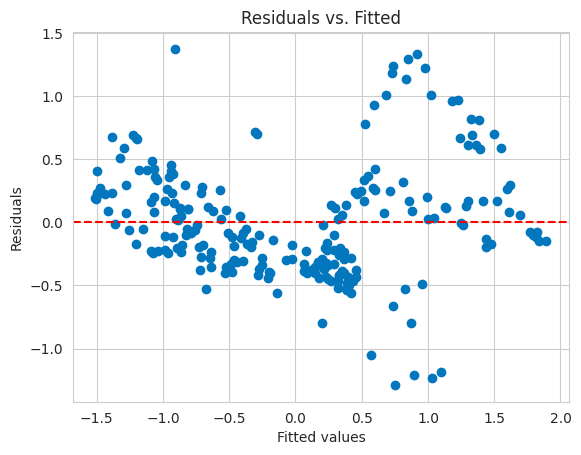

In [ ]:

#Everything are based on model in the last part!
residuals = model.resid

fitted_values = model.predict(X)
plt.scatter(fitted_values, residuals, c='#0277bd')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted')
plt.savefig('Residuals vs. Fitted.png')
plt.show()


### 3.3.2 Obsered vs. Fitted Values

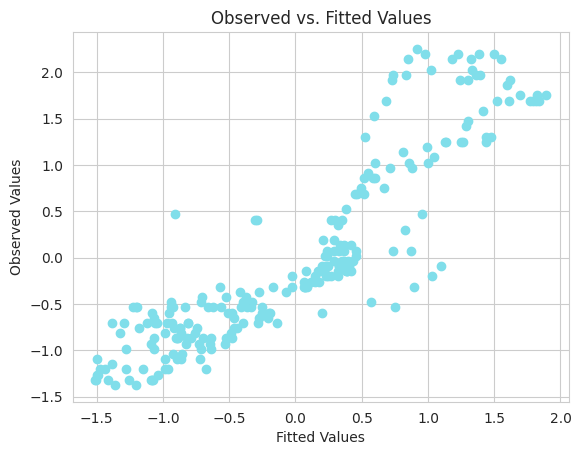

In [ ]:
predicted_values = model.predict(X)
residuals = model.resid

# Scatter plot of observed vs predicted values
plt.scatter(predicted_values, y)
plt.title('Observed vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Observed Values')
plt.show()


### 3.3.3 Residuals vs. Independent Variables Plots

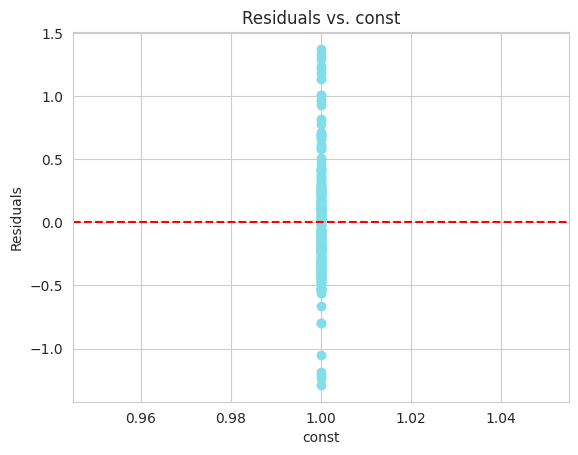

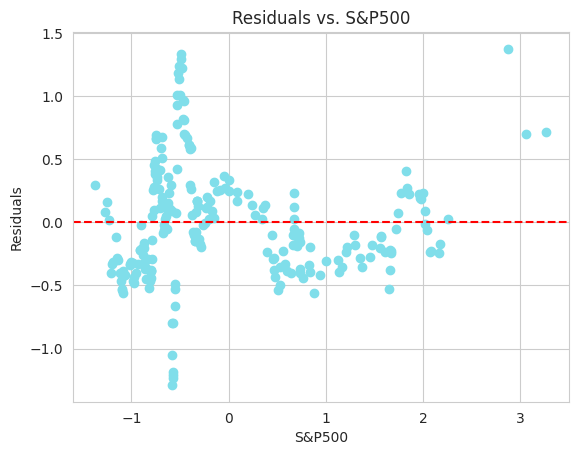

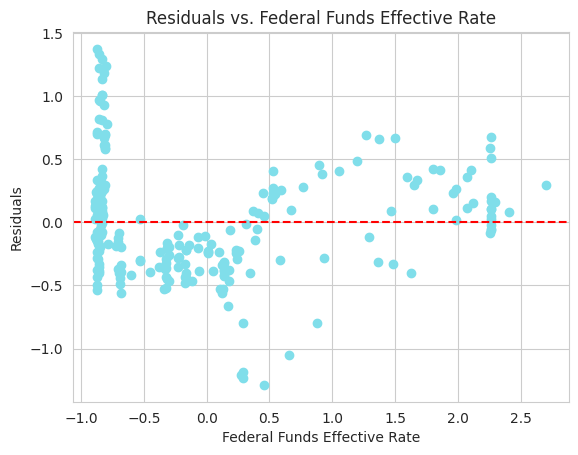

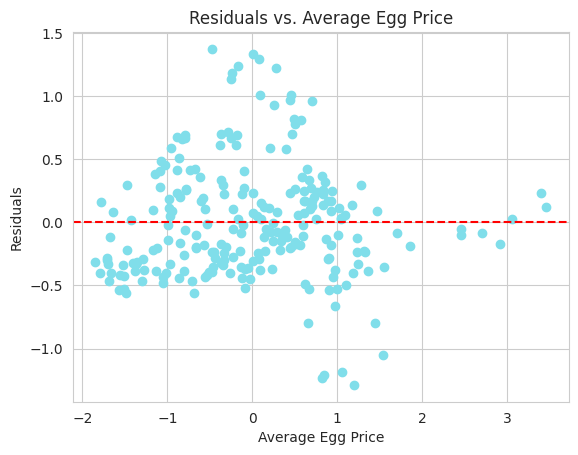

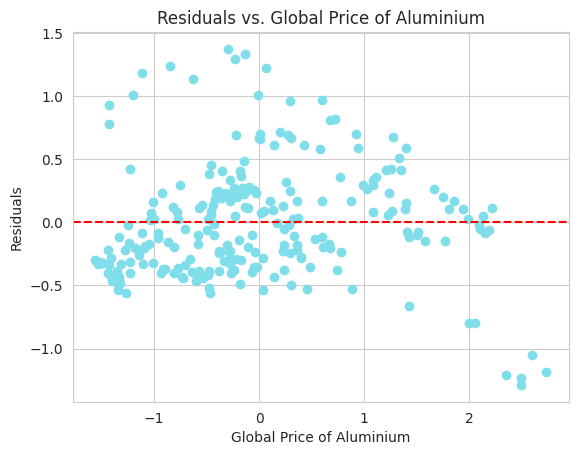

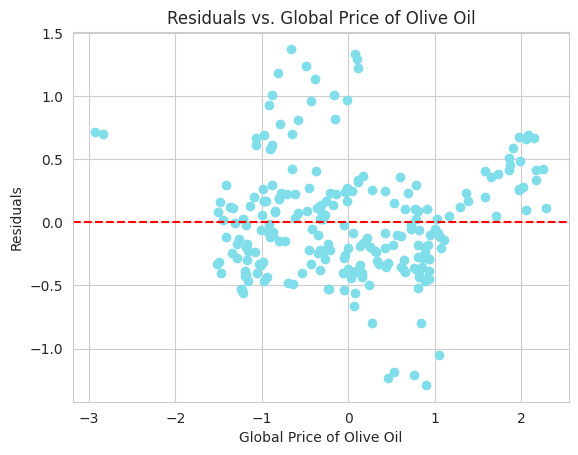

In [ ]:
# Plot residuals against each independent variable
for column in X.columns:
    plt.scatter(X[column], residuals)
    plt.title(f'Residuals vs. {column}')
    plt.xlabel(column)
    plt.ylabel('Residuals')
    plt.axhline(0, linestyle='--', color='red')
    plt.show()


### 3.3.4 Rainbow test for linearity

In [ ]:
from statsmodels.stats.diagnostic import linear_rainbow

# Perform the Rainbow test for linearity
rainbow_stat, rainbow_p_value = linear_rainbow(model)
print("Rainbow stat:", rainbow_stat)
print("Rainbow p-value:", rainbow_p_value)

# Interpretation of results
if rainbow_p_value < 0.05:
    print("The model appears to have non-linearity (reject H0)")
else:
    print("No evidence of non-linearity (fail to reject H0)")

Rainbow stat: 2.993438421324528
Rainbow p-value: 6.952150894497304e-09
The model appears to have non-linearity (reject H0)


## 3.4 Homoscedasticity

### 3.4.1 Plot

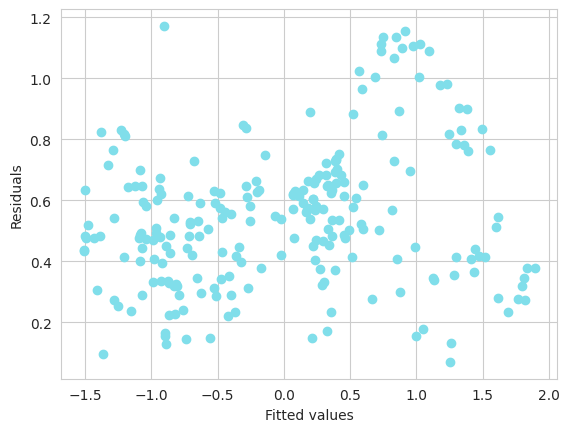

In [ ]:
plt.scatter(fitted_values, np.sqrt(np.abs(residuals)))
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.savefig('Homoscedasticity')
plt.show()

### 3.4.2 Test for Homoscedasticity (Breusch-Pagan Test):

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(residuals, model.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))


{'Lagrange multiplier statistic': 22.5356021357575, 'p-value': 0.0004140234330673507, 'f-value': 4.859557768444138, 'f p-value': 0.00030389985609876203}


Both the Lagrange Multiplier p-value and the F p-value are extremely low (far below the common alpha level of 0.05). This indicates strong evidence against the null hypothesis of the Breusch-Pagan test, which means that the variance of the residuals is not constant **(heterscedasticity)**.


## 3.5 Autocorrelation


### 3.5.1 Durbin-waston test

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

residuals = model.resid

# Perform Durbin-Watson test
dw_statistic = durbin_watson(residuals)

print(f'Durbin-Watson Statistic: {dw_statistic}')
# Generally, a value close to 2 indicates very little autocorrelation


Durbin-Watson Statistic: 0.15611410656063043


 DW statistic of 0.156 is substantially below 2, which suggests that **there is positive autocorrelation** in the residuals

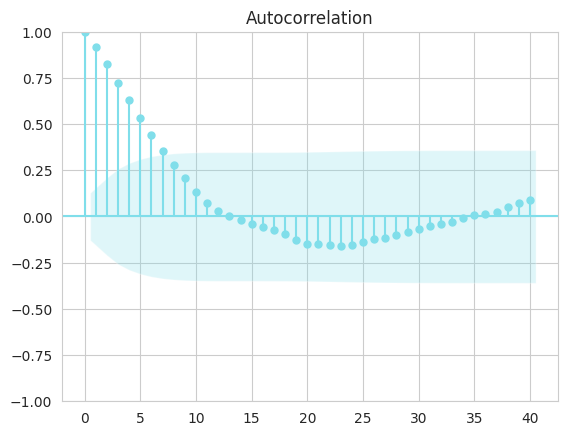

In [ ]:
import statsmodels.tsa.api as smt

# Check for autocorrelation
fig = smt.graphics.plot_acf(model.resid, lags=40, alpha=0.05)
plt.show()


## 3.6 Normality

### 3.61 Normal Q-Q Plot

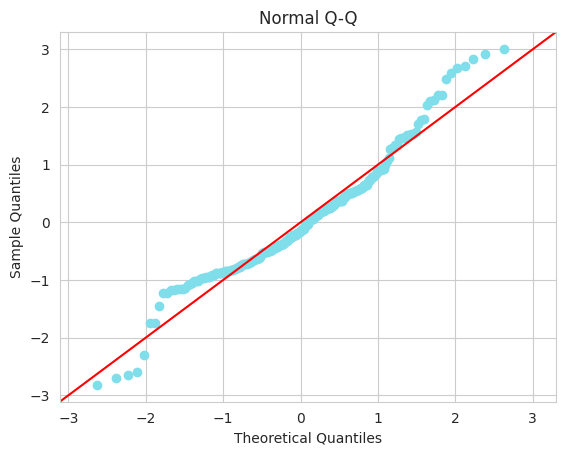

In [ ]:
fig = sm.qqplot(residuals, line='45', fit=True, dist=stats.norm)
plt.title('Normal Q-Q')
plt.savefig('Normal Q-Q.png')
plt.show()


### 3.6.2 Tets for normality(Shapiro-Wilk Test)

In [ ]:
from scipy.stats import shapiro

stat, p_value = shapiro(residuals)
print('Shapiro-Wilk Test p-value:', p_value)


Shapiro-Wilk Test p-value: 5.068945938546676e-06


### 3.6.3 Tets for normality (Jaeque-Bera Test)


In [ ]:
import scipy.stats as stats

jb_stat, jb_p_value = stats.jarque_bera(residuals)
print(f"Jarque-Bera statistic: {jb_stat}")
print(f"p-value: {jb_p_value}")

Jarque-Bera statistic: 18.27450047662946
p-value: 0.00010758275008165227


**p value less than 0.05, suggesting residual are not normally distributed**

# Variable transformation


## 4.1 Box-Cox transformation

In [ ]:
from scipy.stats import boxcox
features = ['S&P500', 'Federal Funds Effective Rate', 'Average Egg Price', 'Global Price of Aluminium', 'Global Price of Olive Oil']
df_transformed = df.copy()
# Apply Box-Cox transformation
for feature in features:
   #Adding a small positive value to avoid issues with zero values
   df_transformed[feature], _ = boxcox(df_transformed[feature] + 5)


## 4.2 Check normality after transformation

In [ ]:
from scipy.stats import shapiro
X_transformed = df_transformed[['S&P500', 'Federal Funds Effective Rate', 'Average Egg Price', 'Global Price of Aluminium', 'Global Price of Olive Oil']]
X_transformed = sm.add_constant(X_transformed)
y_transformed = df_transformed['Monthly Unemployment Rate']
model_trans = sm.OLS(y_transformed,X_transformed).fit()
residuals_trans = model_trans.resid
stat, p_value = shapiro(residuals_trans)
print('Shapiro-Wilk Test p-value:', p_value)

import scipy.stats as stats

jb_stat, jb_p_value = stats.jarque_bera(residuals_trans)
print(f"Jarque-Bera statistic: {jb_stat}")
print(f"p-value: {jb_p_value}")

Shapiro-Wilk Test p-value: 4.143434580328176e-06
Jarque-Bera statistic: 24.069962080046885
p-value: 5.932997215432099e-06


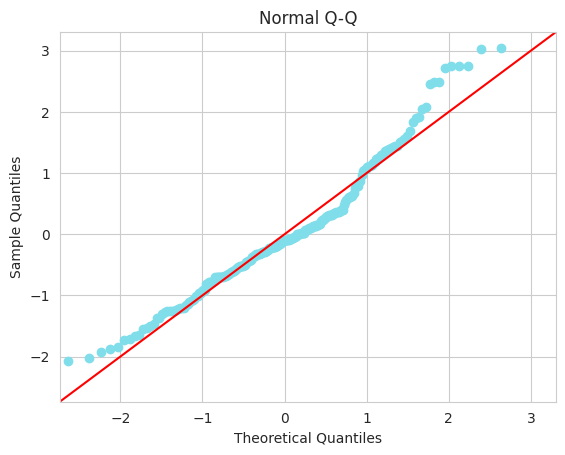

In [ ]:
fig = sm.qqplot(residuals_trans, line='45', fit=True, dist=stats.norm)
plt.title('Normal Q-Q')
plt.savefig('Normal Q-Q.png')
plt.show()


## 4.3 Check linearity after transformation

In [ ]:
from statsmodels.stats.diagnostic import linear_rainbow

rainbow_stat, rainbow_p_value = linear_rainbow(model_trans)
print(f'Rainbow stat: {rainbow_stat}, p-value: {rainbow_p_value}')


Rainbow stat: 3.390146773835494, p-value: 1.6660899318909242e-10


## 4.4 Check Homoscedasticity

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(residuals_trans, model_trans.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))


{'Lagrange multiplier statistic': 14.615706297744609, 'p-value': 0.012136985805497597, 'f-value': 3.037939480214954, 'f p-value': 0.011246878488030845}


## 4.5 Check autocorrelation

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson


# Perform Durbin-Watson test
dw_statistic = durbin_watson(residuals_trans)

print(f'Durbin-Watson Statistic: {dw_statistic}')
# Generally, a value close to 2 indicates very little autocorrelation


Durbin-Watson Statistic: 0.17630230910743833


## Check multicollinearity

In [ ]:
# Create a DataFrame for VIFs
vif_data = pd.DataFrame()
vif_data["feature"] = X_transformed.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_transformed.values, i) for i in range(len(X_transformed.columns))]

print(vif_data)

                        feature            VIF
0                         const  195935.700080
1                        S&P500       1.384430
2  Federal Funds Effective Rate       2.352164
3             Average Egg Price       2.592165
4     Global Price of Aluminium       1.506436
5     Global Price of Olive Oil       1.433644


#Model selection


In [ ]:
target_variable = 'Monthly Unemployment Rate'
features = ['S&P500', 'Federal Funds Effective Rate','Average Egg Price',
            'Global Price of Aluminium', 'Global Price of Olive Oil']

X = df[features].values
y = df[target_variable].values

##5.1 OLS

In [ ]:
#OLS
# Remember to add a constant before regression
X_train = sm.add_constant(X)
y_train = y

from statsmodels.regression.linear_model import OLS
ols_model = OLS(y_train, X_train).fit()
print(ols_model.summary())


from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predict the values using the model
predictions = ols_model.predict(X_train)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_train, predictions))
print(f"Root Mean Square Error (RMSE): {rmse}")

# Calculate MAE
mae = mean_absolute_error(y_train, predictions)
print(f"Mean Absolute Error (MAE): {mae}")


# B-P test
residuals = ols_model.resid

# Perform the Breusch-Pagan test
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(residuals, ols_model.model.exog)
bp_stat, bp_pvalue = bp_test[:2]

print(f"Breusch-Pagan Test Statistic: {bp_stat}")
print(f"Breusch-Pagan Test p-value: {bp_pvalue}")



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     173.0
Date:                Wed, 08 May 2024   Prob (F-statistic):           1.62e-75
Time:                        01:26:54   Log-Likelihood:                -148.63
No. Observations:                 234   AIC:                             309.3
Df Residuals:                     228   BIC:                             330.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.106e-16      0.030  -2.02e-14      1.0

## 5.2 WLS

In [ ]:
# WLS

residuals = ols_model.resid
weights = 1 / (residuals**2)
# same independent & dependent variables as above

# Fit WLS model
wls_model = sm.WLS(y_train, X_train, weights=weights).fit()

# Get the summary of the model
wls_summary = wls_model.summary()
print(wls_summary)

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predict the values using the model
predictions = wls_model.predict(X_train)


# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_train, predictions))
print(f"Root Mean Square Error (RMSE): {rmse}")

# Calculate MAE
mae = mean_absolute_error(y_train, predictions)
print(f"Mean Absolute Error (MAE): {mae}")


# B-P test
residuals = wls_model.resid

# Perform the Breusch-Pagan test
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(residuals, wls_model.model.exog)
bp_stat, bp_pvalue = bp_test[:2]

print(f"Breusch-Pagan Test Statistic: {bp_stat}")
print(f"Breusch-Pagan Test p-value: {bp_pvalue}")

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            WLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.865e+04
Date:                Wed, 08 May 2024   Prob (F-statistic):          1.29e-295
Time:                        01:26:54   Log-Likelihood:                0.95197
No. Observations:                 234   AIC:                             10.10
Df Residuals:                     228   BIC:                             30.83
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0073      0.007     -1.071      0.2

## 5.3 GLS

In [ ]:
from statsmodels.regression.linear_model import GLS
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.stats.diagnostic import het_breuschpagan

# Assuming a simple AR(1) correlation structure for demonstration
rho = 0.5  # Replace this with an estimated autocorrelation value
n = len(y_train)
cov_matrix = np.fromfunction(lambda i, j: rho ** abs(i - j), (n, n))

# Fit the GLS model with the estimated covariance matrix
gls_model = GLS(y_train, X_train, sigma=cov_matrix)
gls_results = gls_model.fit()
print(gls_results.summary())

# Predictions and evaluation
predictions = gls_results.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, predictions))
mae = mean_absolute_error(y_train, predictions)

# Use the fitted model to get residuals
residuals = gls_results.resid

# Perform the Breusch-Pagan test
bp_test = het_breuschpagan(residuals, gls_results.model.exog)
bp_stat, bp_pvalue = bp_test[:2]

print(f"Breusch-Pagan Test Statistic: {bp_stat}")
print(f"Breusch-Pagan Test p-value: {bp_pvalue}")

print(f"Root Mean Square Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")


                            GLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.737
Model:                            GLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     128.0
Date:                Wed, 08 May 2024   Prob (F-statistic):           3.96e-64
Time:                        01:26:54   Log-Likelihood:                -17.949
No. Observations:                 234   AIC:                             47.90
Df Residuals:                     228   BIC:                             68.63
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0044      0.034      0.128      0.8

## 5.4 Lasso

In [ ]:
target_variable = 'Monthly Unemployment Rate'
features = ['S&P500', 'Federal Funds Effective Rate','Average Egg Price',
            'Global Price of Aluminium', 'Global Price of Olive Oil']

X_train = df[features].values
y_train = df[target_variable].values

In [ ]:
# Packages to import

import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import jarque_bera



In [ ]:
import numpy as np
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson, jarque_bera
import statsmodels.api as sm

# Assuming X_train, y_train are predefined data

# Define a range of alpha values for Lasso regression
alphas = np.logspace(-6, 6, 200)  # Creates 200 values from 10^-6 to 10^6

# Lasso Cross-Validation
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso_cv.fit(X_train, y_train)

# Optimal alpha
print("Optimal alpha for Lasso:", lasso_cv.alpha_)

# Perform Lasso regression
lasso = Lasso(alpha=lasso_cv.alpha_)
lasso.fit(X_train, y_train)

# Predict and calculate the mean squared error
Y_pred = lasso.predict(X_train)
mse = mean_squared_error(y_train, Y_pred)
print('Mean Squared Error:', mse)

# Print coefficients
print('Coefficients:', lasso.coef_)

# Evaluation
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, Y_pred)
r2 = r2_score(y_train, Y_pred)
adj_r2 = 1 - (1 - r2) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)

# Calculate AIC and BIC
n_samples = len(y_train)
n_features = np.sum(lasso.coef_ != 0) + 1  # Number of non-zero coefficients plus the intercept

aic = n_samples * np.log(mse) + 2 * n_features
bic = n_samples * np.log(mse) + n_features * np.log(n_samples)

# Print scores
print('Mean Squared Error', mse)
print('R square', r2)
print('Adjusted R square', adj_r2)
print('RMSE', rmse)
print('MAE', mae)
print('AIC', aic)
print('BIC', bic)

# BP test
residuals = y_train - Y_pred

# Add a constant to the features, required for the B-P test
X_with_constant = sm.add_constant(X_train)

# Perform the Breusch-Pagan test
bp_test = het_breuschpagan(residuals, X_with_constant)

# Output the results
labels = ['Lagrange multiplier statistic', 'BP Test p-value', 'f-value', 'f p-value']
results = dict(zip(labels, bp_test))
print(results)

# DW
dw_statistic = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_statistic}")

# J-B test
jb_test = jarque_bera(residuals)
jb_value, jb_pvalue = jb_test[:2]

print(f"Jarque-Bera statistic: {jb_value}, p-value: {jb_pvalue}")


Optimal alpha for Lasso: 1e-06
Mean Squared Error: 0.20855904748119694
Coefficients: [-0.59411796 -0.82976725 -0.0673273   0.44586883 -0.27423561]
Mean Squared Error 0.20855904748119694
R square 0.7914409525188031
Adjusted R square 0.786867289196847
RMSE 0.4566826551131507
MAE 0.3521028475985999
AIC -354.80273989832
BIC -334.0708132061738
{'Lagrange multiplier statistic': 22.535719938706947, 'BP Test p-value': 0.00041400201926397774, 'f-value': 4.859585878556785, 'f p-value': 0.00030388273410626655}
Durbin-Watson statistic: 0.15611319339039348
Jarque-Bera statistic: 18.27497208663467, p-value: 0.00010755738452176946


## 5.5 Ridge

In [ ]:
# Ridge
from sklearn.linear_model import RidgeCV

# Define a range of alpha values for Ridge regression
alphas = np.logspace(-6, 6, 200)  # Creates 200 values from 10^-6 to 10^6

# Initialize RidgeCV with specified alphas and cross-validation strategy
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_train, y_train)

# Optimal alpha
print("Optimal alpha for Ridge:", ridge_cv.alpha_)

# Perform Ridge regression
ridge = Ridge(alpha=ridge_cv.alpha_)
ridge.fit(X_train, y_train)

# Predict using the Ridge model
Y_pred = ridge.predict(X_train)
mse = mean_squared_error(y_train, Y_pred)
print('Mean Squared Error:', mse)

# Print coefficients
print('Coefficients:', ridge.coef_)

# Evaluation
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, Y_pred)
r2 = r2_score(y_train, Y_pred)
adj_r2 = 1 - (1 - r2) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)

# Calculate AIC and BIC
n_samples = len(y_train)
n_features = np.sum(ridge.coef_ != 0) + 1  # Number of non-zero coefficients plus the intercept

aic = n_samples * np.log(mse) + 2 * n_features
bic = n_samples * np.log(mse) + n_features * np.log(n_samples)

# Print scores
print('Mean Squared Error', mse)
print('R square', r2)
print('Adjusted R square', adj_r2)
print('RMSE', rmse)
print('MAE', mae)
print('AIC', aic)
print('BIC', bic)

# BP test
residuals = y_train - Y_pred

# Add a constant to the features, required for the B-P test
X_with_constant = sm.add_constant(X_train)

# Perform the Breusch-Pagan test
bp_test = het_breuschpagan(residuals, X_with_constant)

# Output the results
labels = ['Lagrange multiplier statistic', 'BP test p-value', 'f-value', 'f p-value']
results = dict(zip(labels, bp_test))
print(results)

# DW
dw_statistic = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_statistic}")

# J-B test
jb_test = jarque_bera(residuals)
jb_value, jb_pvalue = jb_test[:2]

print(f"Jarque-Bera statistic: {jb_value}, p-value: {jb_pvalue}")

# J-B test
jb_test = jarque_bera(residuals)
jb_value, jb_pvalue = jb_test[:2]

print(f"Jarque-Bera statistic: {jb_value}, p-value: {jb_pvalue}")

Optimal alpha for Ridge: 0.9329304026284677
Mean Squared Error: 0.2086052830489701
Coefficients: [-0.59080242 -0.82145869 -0.06280342  0.44011159 -0.27427397]
Mean Squared Error 0.2086052830489701
R square 0.7913947169510298
Adjusted R square 0.786820039691184
RMSE 0.4567332734200237
MAE 0.3517235566830164
AIC -354.7508700613688
BIC -334.0189433692226
{'Lagrange multiplier statistic': 22.80663876277074, 'BP test p-value': 0.00036753966746433755, 'f-value': 4.9243154306074715, 'f p-value': 0.00026690272258062084}
Durbin-Watson statistic: 0.15460716555643597
Jarque-Bera statistic: 19.325348779764035, p-value: 6.36141651532363e-05
Jarque-Bera statistic: 19.325348779764035, p-value: 6.36141651532363e-05


## 5.6 Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNetCV, ElasticNet

# Define a range of alpha values
alphas = np.logspace(-6, 1, 50)  # 50 alpha values from 10^-6 to 10^1

# Define a range of l1_ratio values from 0 to 1
l1_ratios = np.linspace(0.01, 1, 25)  # Avoiding 0 to ensure some level of L1 penalty

# Initialize ElasticNetCV
elastic_net_cv = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=5, random_state=42)

# Fit the model
elastic_net_cv.fit(X_train, y_train)

# Optimal alpha and l1_ratio
optimal_alpha = elastic_net_cv.alpha_
optimal_l1_ratio = elastic_net_cv.l1_ratio_

print("Optimal alpha:", optimal_alpha)
print("Optimal l1_ratio:", optimal_l1_ratio)

elastic_net = ElasticNet(alpha=optimal_alpha, l1_ratio=optimal_l1_ratio)
elastic_net.fit(X_train, y_train)

# Predict and calculate the mean squared error
Y_pred = elastic_net.predict(X_train)
mse = mean_squared_error(y_train, Y_pred)
print('Mean Squared Error:', mse)

# Print coefficients
print('Coefficients:', elastic_net.coef_)

# Evaluation
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, Y_pred)
r2 = r2_score(y_train, Y_pred)
adj_r2 = 1 - (1 - r2) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)

# Calculate AIC and BIC
n_samples = len(y_train)
n_features = np.sum(elastic_net.coef_ != 0) + 1  # Number of non-zero coefficients plus the intercept

aic = n_samples * np.log(mse) + 2 * n_features
bic = n_samples * np.log(mse) + n_features * np.log(n_samples)

# Print scores
print('Mean Squared Error', mse)
print('R square', r2)
print('Adjusted R square', adj_r2)
print('RMSE', rmse)
print('MAE', mae)
print('AIC', aic)
print('BIC', bic)

# BP test
residuals = y_train - Y_pred

# Add a constant to the features, required for the B-P test
X_with_constant = sm.add_constant(X_train)

# Perform the Breusch-Pagan test
bp_test = het_breuschpagan(residuals, X_with_constant)

# Output the results
labels = ['Lagrange multiplier statistic', 'BP p-value', 'f-value', 'f p-value']
results = dict(zip(labels, bp_test))
print(results)

# DW
dw_statistic = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_statistic}")

# J-B test
jb_test = jarque_bera(residuals)
jb_value, jb_pvalue = jb_test[:2]

print(f"Jarque-Bera statistic: {jb_value}, p-value: {jb_pvalue}")


Optimal alpha: 0.019306977288832496
Optimal l1_ratio: 0.01
Mean Squared Error: 0.20957377317279285
Coefficients: [-0.5782781  -0.79115833 -0.04651074  0.4189465  -0.27392142]
Mean Squared Error 0.20957377317279285
R square 0.7904262268272071
Adjusted R square 0.7858303107488563
RMSE 0.4577922816876589
MAE 0.3514491156391904
AIC -353.6669941914937
BIC -332.9350674993475
{'Lagrange multiplier statistic': 23.895366161566507, 'BP p-value': 0.00022739832226556668, 'f-value': 5.186124061429969, 'f p-value': 0.00015787357845645374}
Durbin-Watson statistic: 0.14874521865127122
Jarque-Bera statistic: 23.296174172651067, p-value: 8.7357471194899e-06


# Back Testing

## 6.1 Predictive Power Test

In [ ]:
target_variable = 'Monthly Unemployment Rate'
features = ['S&P500', 'Federal Funds Effective Rate','Average Egg Price',
            'Global Price of Aluminium', 'Global Price of Olive Oil']


In [ ]:
X = df[features].values
y = df[target_variable].values

# Import necessary libraries for KFold
from statsmodels.regression.linear_model import GLSAR
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm


In [ ]:
from statsmodels.regression.linear_model import OLS
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import statsmodels.api as sm

# Initialize lists to store results
ols_mse_scores = []
ols_rmse_scores = []
ols_mae_scores = []
ols_r2_scores = []
ols_adjusted_r2_scores = []

from sklearn.model_selection import KFold

# Define the number of splits
n_splits = 10

# Initialize the KFold object
kf = KFold(n_splits=n_splits)

# Loop over the folds
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Add a constant to the features (required by statsmodels)
    X_train_const = sm.add_constant(X_train)
    X_test_const = sm.add_constant(X_test)

    # Fit an OLS model on the training data
    ols_model = OLS(y_train, X_train_const).fit()

    # Predict on test data using the fitted OLS model
    y_pred = ols_model.predict(X_test_const)

    # Calculate mean squared error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    ols_mse_scores.append(mse)

    # Calculate root mean squared error (RMSE)
    rmse = np.sqrt(mse)
    ols_rmse_scores.append(rmse)

    # Calculate mean absolute error (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    ols_mae_scores.append(mae)

    # Calculate R-squared
    r2 = r2_score(y_test, y_pred)
    ols_r2_scores.append(r2)

    # Calculate Adjusted R-squared
    n = len(y_test)
    p = X_test_const.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    ols_adjusted_r2_scores.append(adjusted_r2)

# Compute the average of each metric across all folds
mean_mse = np.mean(ols_mse_scores)
mean_rmse = np.mean(ols_rmse_scores)
mean_mae = np.mean(ols_mae_scores)
mean_r2 = np.mean(ols_r2_scores)
mean_adjusted_r2 = np.mean(ols_adjusted_r2_scores)

mean_mse, mean_rmse, mean_mae, mean_r2, mean_adjusted_r2


(0.5335128685696455,
 0.6534747804074482,
 0.6020137451285785,
 -8.187561461133507,
 -11.497161797292433)

In [ ]:
from statsmodels.regression.linear_model import WLS
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize lists to store results
wls_mse_scores = []
wls_rmse_scores = []
wls_mae_scores = []
wls_r2_scores = []
wls_adjusted_r2_scores = []

# Loop over the folds
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Add a constant to the features (required by statsmodels)
    X_train_const = sm.add_constant(X_train)
    X_test_const = sm.add_constant(X_test)

    # Fit an OLS model on the training data to get residuals
    ols_model = sm.OLS(y_train, X_train_const).fit()
    residuals = ols_model.resid

    # Compute weights using the inverse of the squared residuals
    weights = 1 / (residuals ** 2)

    # Fit a WLS model on the training data using computed weights
    wls_model = WLS(y_train, X_train_const, weights=weights)
    wls_results = wls_model.fit()

    # Predict on the test data using the fitted WLS model
    y_pred = wls_results.predict(X_test_const)

    # Calculate mean squared error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    wls_mse_scores.append(mse)

    # Calculate root mean squared error (RMSE)
    rmse = np.sqrt(mse)
    wls_rmse_scores.append(rmse)

    # Calculate mean absolute error (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    wls_mae_scores.append(mae)

    # Calculate R-squared
    r2 = r2_score(y_test, y_pred)
    wls_r2_scores.append(r2)

    # Calculate Adjusted R-squared
    n = len(y_test)
    p = X_test_const.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    wls_adjusted_r2_scores.append(adjusted_r2)

# Compute the average of each metric across all folds
mean_mse = np.mean(wls_mse_scores)
mean_rmse = np.mean(wls_rmse_scores)
mean_mae = np.mean(wls_mae_scores)
mean_r2 = np.mean(wls_r2_scores)
mean_adjusted_r2 = np.mean(wls_adjusted_r2_scores)

mean_mse, mean_rmse, mean_mae, mean_r2, mean_adjusted_r2


(0.5273474833359305,
 0.6518562988362273,
 0.6007963796114791,
 -7.846625399936184,
 -11.03655167789773)

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
import numpy as np

# Initialize lists to store results
mse_scores = []
rmse_scores = []
mae_scores = []
r2_scores = []
adjusted_r2_scores = []

# Number of splits for cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Loop over the folds
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Add a constant to the features (required by statsmodels)
    X_train_const = sm.add_constant(X_train)
    X_test_const = sm.add_constant(X_test)

    # Fit a GLS model on the training data with a simple AR(1) covariance matrix
    rho = 0.5  # You can estimate this or adjust based on your data
    n = len(y_train)
    cov_matrix = np.fromfunction(lambda i, j: rho ** abs(i - j), (n, n))

    gls_model = sm.GLS(y_train, X_train_const, sigma=cov_matrix)
    gls_results = gls_model.fit()

    # Predict on the test data using the fitted GLS model
    y_pred = gls_results.predict(X_test_const)

    # Calculate mean squared error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

    # Calculate root mean squared error (RMSE)
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)

    # Calculate mean absolute error (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)

    # Calculate R-squared
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

    # Calculate Adjusted R-squared
    n_test = len(y_test)
    p = X_test_const.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n_test - 1) / (n_test - p - 1)
    adjusted_r2_scores.append(adjusted_r2)

# Compute the average of each metric across all folds
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
mean_r2 = np.mean(r2_scores)
mean_adjusted_r2 = np.mean(adjusted_r2_scores)

mean_mse, mean_rmse, mean_mae, mean_r2, mean_adjusted_r2


(0.2232455367682058,
 0.46983234043532374,
 0.3737756812387588,
 0.7713135701866713,
 0.7368003161846216)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize lists to store results
lasso_mse_scores = []
lasso_rmse_scores = []
lasso_mae_scores = []
lasso_r2_scores = []
lasso_adjusted_r2_scores = []

# Use KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop over the folds
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize Lasso regression model
    lasso_model = Lasso(alpha= lasso_cv.alpha_)  # Adjust 'alpha' as needed

    # Fit Lasso model on training data
    lasso_model.fit(X_train, y_train)

    # Predict on test data using the fitted Lasso model
    y_pred = lasso_model.predict(X_test)

    # Calculate mean squared error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    lasso_mse_scores.append(mse)

    # Calculate root mean squared error (RMSE)
    rmse = np.sqrt(mse)
    lasso_rmse_scores.append(rmse)

    # Calculate mean absolute error (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    lasso_mae_scores.append(mae)

    # Calculate R-squared
    r2 = r2_score(y_test, y_pred)
    lasso_r2_scores.append(r2)

    # Calculate Adjusted R-squared
    n = len(y_test)
    p = X_test.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    lasso_adjusted_r2_scores.append(adjusted_r2)

# Compute the average of each metric across all folds
mean_mse = np.mean(lasso_mse_scores)
mean_rmse = np.mean(lasso_rmse_scores)
mean_mae = np.mean(lasso_mae_scores)
mean_r2 = np.mean(lasso_r2_scores)
mean_adjusted_r2 = np.mean(lasso_adjusted_r2_scores)

mean_mse, mean_rmse, mean_mae, mean_r2, mean_adjusted_r2


(0.21928690243362917,
 0.4651321683385364,
 0.3616841300411125,
 0.7750289140419173,
 0.7474242323625162)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize lists to store results
mse_scores = []
rmse_scores = []
mae_scores = []
r2_scores = []
adjusted_r2_scores = []

# Loop over the folds
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize Ridge regression model
    ridge_model = Ridge(alpha = ridge_cv.alpha_)  # Adjust 'alpha' as needed

    # Fit Ridge model on training data
    ridge_model.fit(X_train, y_train)

    # Predict on test data using the fitted Ridge model
    y_pred = ridge_model.predict(X_test)

    # Calculate mean squared error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

    # Calculate root mean squared error (RMSE)
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)

    # Calculate mean absolute error (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)

    # Calculate R-squared
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

    # Calculate Adjusted R-squared
    n = len(y_test)
    p = X_test.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    adjusted_r2_scores.append(adjusted_r2)

# Compute the average of each metric across all folds
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
mean_r2 = np.mean(r2_scores)
mean_adjusted_r2 = np.mean(adjusted_r2_scores)

mean_mse, mean_rmse, mean_mae, mean_r2, mean_adjusted_r2


(0.2192710579789058,
 0.46509851650020256,
 0.361396647124614,
 0.7752279917299769,
 0.747647327169713)

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize lists to store results
mse_scores = []
rmse_scores = []
mae_scores = []
r2_scores = []
adjusted_r2_scores = []

# Number of folds for cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop over the folds
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize Elastic Net regression model
    elastic_net_model = ElasticNet(alpha=elastic_net_cv.alpha_, l1_ratio=elastic_net_cv.l1_ratio_)    # Adjust 'alpha' and 'l1_ratio' as needed

    # Fit Elastic Net model on training data
    elastic_net_model.fit(X_train, y_train)

    # Predict on test data using the fitted Elastic Net model
    y_pred = elastic_net_model.predict(X_test)

    # Calculate mean squared error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

    # Calculate root mean squared error (RMSE)
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)

    # Calculate mean absolute error (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)

    # Calculate R-squared
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

    # Calculate Adjusted R-squared
    n = len(y_test)
    p = X_test.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    adjusted_r2_scores.append(adjusted_r2)

# Compute the average of each metric across all folds
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
mean_r2 = np.mean(r2_scores)
mean_adjusted_r2 = np.mean(adjusted_r2_scores)

mean_mse, mean_rmse, mean_mae, mean_r2, mean_adjusted_r2


(0.22002814861897463,
 0.4658630179057548,
 0.3616457435376989,
 0.7749263341931139,
 0.7473078095212639)